In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

file_path = os.path.join("Resources","Population+Drive+Median_Income_by_Zip.csv")
income_df=pd.read_csv(file_path)
file_path = os.path.join("Resources","ktop100latlng.csv")
latlng_df=pd.read_csv(file_path)
place =os.path.join('Resources','ZIP-COUNTY-FIPS_2018-03.csv')
df_fp=pd.read_csv(place)

In [2]:
latlng_df.head()

,date,county,state,fips,cases_x,deaths,cases_y,rate,Population,Latitude,Longitude
0,9/8/2020,Tehama,California,6103.0,453,1,4,112.250000,144905,40.027102,-122.123323
1,9/8/2020,Bingham,Idaho,16011.0,676,9,7,95.571429,121264,43.211230,-112.362415
2,9/8/2020,Stone,Missouri,29209.0,316,2,4,78.000000,121684,36.774888,-93.459933
3,9/8/2020,Sebastian,Arkansas,5131.0,3042,38,40,75.050000,142299,35.226040,-94.315422
4,9/8/2020,Portage,Wisconsin,55097.0,798,2,11,71.545455,143879,43.539149,-89.462620


In [3]:
df_fp.head(100)

,ZIP,STCOUNTYFP,CITY,STATE,COUNTYNAME,CLASSFP
0,36091,1001,Verbena,AL,Autauga County,H1
1,36758,1001,Plantersville,AL,Autauga County,H1
2,36006,1001,Billingsley,AL,Autauga County,H1
3,36067,1001,Prattville,AL,Autauga County,H1
4,36701,1001,Selma,AL,Autauga County,H1
...,...,...,...,...,...,...
95,36456,1013,Mc kenzie,AL,Butler County,H1
96,36030,1013,Forest home,AL,Butler County,H1
97,36032,1013,Fort deposit,AL,Butler County,H1
98,36037,1013,Greenville,AL,Butler County,H1


In [4]:
data=income_df[['Population','Zipcode','Median Income']]

In [5]:
income_data_df=data.rename({'Zipcode':'ZIP'},axis=1)

In [6]:
income_data_df.head(100)

,Population,ZIP,Median Income
0,8642,43964,25320.0
1,51116,28216,30701.0
2,71605,28277,54326.0
3,27286,28278,40769.0
4,29414,28303,26706.0
...,...,...,...
95,2309,29448,16799.0
96,38267,29466,49087.0
97,9242,29472,24089.0
98,22056,29488,21427.0


In [7]:
zip_income=pd.merge(income_data_df,df_fp,on='ZIP')

In [8]:
zip_income.head(100)

,Population,ZIP,Median Income,STCOUNTYFP,CITY,STATE,COUNTYNAME,CLASSFP
0,8642,43964,25320.0,39081,Toronto,OH,Jefferson County,H1
1,51116,28216,30701.0,37119,Charlotte,NC,Mecklenburg County,H1
2,71605,28277,54326.0,37119,Charlotte,NC,Mecklenburg County,H1
3,27286,28278,40769.0,37119,Charlotte,NC,Mecklenburg County,H1
4,29414,28303,26706.0,37051,Fayetteville,NC,Cumberland County,H1
...,...,...,...,...,...,...,...,...
95,2370,28684,24423.0,37009,Todd,NC,Ashe County,H1
96,2370,28684,24423.0,37189,Todd,NC,Watauga County,H1
97,32330,28405,28902.0,37129,Wilmington,NC,New Hanover County,H1
98,1584,28442,19819.0,37047,Hallsboro,NC,Columbus County,H1


In [9]:
zip_income=zip_income.rename({'STCOUNTYFP':'fips'},axis=1)
zip_income.head(100)


,Population,ZIP,Median Income,fips,CITY,STATE,COUNTYNAME,CLASSFP
0,8642,43964,25320.0,39081,Toronto,OH,Jefferson County,H1
1,51116,28216,30701.0,37119,Charlotte,NC,Mecklenburg County,H1
2,71605,28277,54326.0,37119,Charlotte,NC,Mecklenburg County,H1
3,27286,28278,40769.0,37119,Charlotte,NC,Mecklenburg County,H1
4,29414,28303,26706.0,37051,Fayetteville,NC,Cumberland County,H1
...,...,...,...,...,...,...,...,...
95,2370,28684,24423.0,37009,Todd,NC,Ashe County,H1
96,2370,28684,24423.0,37189,Todd,NC,Watauga County,H1
97,32330,28405,28902.0,37129,Wilmington,NC,New Hanover County,H1
98,1584,28442,19819.0,37047,Hallsboro,NC,Columbus County,H1


In [10]:
income_latlong=pd.merge(zip_income,latlng_df,on='fips', how='right' )
income_latlong.head(100)


,Population_x,ZIP,Median Income,fips,CITY,STATE,COUNTYNAME,CLASSFP,date,county,state,cases_x,deaths,cases_y,rate,Population_y,Latitude,Longitude
0,5366,28073,23263.0,37045,Grover,NC,Cleveland County,H1,9/8/2020,Cleveland,North Carolina,1717,50,90,18.077778,146233,35.733195,-80.677011
1,27581,28150,22804.0,37045,Shelby,NC,Cleveland County,H1,9/8/2020,Cleveland,North Carolina,1717,50,90,18.077778,146233,35.733195,-80.677011
2,10056,28168,23320.0,37045,Vale,NC,Cleveland County,H1,9/8/2020,Cleveland,North Carolina,1717,50,90,18.077778,146233,35.733195,-80.677011
3,721,28017,2499.0,37045,Boiling springs,NC,Cleveland County,H1,9/8/2020,Cleveland,North Carolina,1717,50,90,18.077778,146233,35.733195,-80.677011
4,13991,28021,24752.0,37045,Cherryville,NC,Cleveland County,H1,9/8/2020,Cleveland,North Carolina,1717,50,90,18.077778,146233,35.733195,-80.677011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,12489,29323,24313.0,45021,Chesnee,SC,Cherokee County,H1,9/8/2020,Cherokee,South Carolina,903,33,39,22.153846,112213,35.012040,-81.603506
96,8987,29330,25065.0,45021,Cowpens,SC,Cherokee County,H1,9/8/2020,Cherokee,South Carolina,903,33,39,22.153846,112213,35.012040,-81.603506
97,20482,29341,26187.0,45021,Gaffney,SC,Cherokee County,H1,9/8/2020,Cherokee,South Carolina,903,33,39,22.153846,112213,35.012040,-81.603506
98,1187,29370,21649.0,45059,Mountville,SC,Laurens County,H1,9/8/2020,Laurens,South Carolina,1538,54,67,21.955224,174599,34.499012,-82.014260


In [11]:
bins = [9999, 19999, 29999, 39999, 49999, 59999, 75000]

# Create the names for the four bins
group_names = ["<$10K", "$10-20K", "$20-30K", "$30-40K", "$40-50K", ">$60"]

In [12]:
income_latlong["Median Income Summary"] = pd.cut(income_latlong['Median Income'], bins, labels=group_names)
income_latlong


,Population_x,ZIP,Median Income,fips,CITY,STATE,COUNTYNAME,CLASSFP,date,county,state,cases_x,deaths,cases_y,rate,Population_y,Latitude,Longitude,Median Income Summary
0,5366,28073,23263.0,37045,Grover,NC,Cleveland County,H1,9/8/2020,Cleveland,North Carolina,1717,50,90,18.077778,146233,35.733195,-80.677011,$10-20K
1,27581,28150,22804.0,37045,Shelby,NC,Cleveland County,H1,9/8/2020,Cleveland,North Carolina,1717,50,90,18.077778,146233,35.733195,-80.677011,$10-20K
2,10056,28168,23320.0,37045,Vale,NC,Cleveland County,H1,9/8/2020,Cleveland,North Carolina,1717,50,90,18.077778,146233,35.733195,-80.677011,$10-20K
3,721,28017,2499.0,37045,Boiling springs,NC,Cleveland County,H1,9/8/2020,Cleveland,North Carolina,1717,50,90,18.077778,146233,35.733195,-80.677011,NaN
4,13991,28021,24752.0,37045,Cherryville,NC,Cleveland County,H1,9/8/2020,Cleveland,North Carolina,1717,50,90,18.077778,146233,35.733195,-80.677011,$10-20K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,20195,93630,22901.0,6039,Kerman,CA,Madera County,H1,9/8/2020,Madera,California,4025,58,106,36.971698,247134,36.961336,-120.060718,$10-20K
1701,39381,93637,26168.0,6039,Madera,CA,Madera County,H1,9/8/2020,Madera,California,4025,58,106,36.971698,247134,36.961336,-120.060718,$10-20K
1702,2960,93643,30905.0,6039,North fork,CA,Madera County,H1,9/8/2020,Madera,California,4025,58,106,36.971698,247134,36.961336,-120.060718,$20-30K
1703,1726,93601,22409.0,6039,Ahwahnee,CA,Madera County,H1,9/8/2020,Madera,California,4025,58,106,36.971698,247134,36.961336,-120.060718,$10-20K


NameError: name 'ax' is not defined

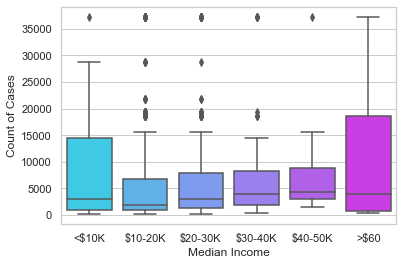

In [13]:
sns.set(style="whitegrid")
g = sns.boxplot(x = 'Median Income Summary',y='cases_x',data = income_latlong, palette="cool")
plt.xlabel('Median Income')
plt.ylabel('Count of Cases')

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.title('Median Income by Cases September 8, 2020')
output_path = os.path.join("Images", "MIX.png")
plt.savefig(output_path)
plt.show()

In [ ]:
sns.set(style="whitegrid")
sns.boxplot(x = 'Median Income Summary',y='cases_y',data = income_latlong, palette="cool")

plt.xlabel('Median Income')
plt.ylabel('Count of Cases')

plt.title('Median Income by Cases May 31, 2020')
output_path = os.path.join("Images", "MIY.png")
plt.savefig(output_path)
plt.show()

In [ ]:
sns.set(style="whitegrid")
sns.boxplot(x = 'Median Income Summary',y='rate',data = income_latlong, palette="PuBuGn")

plt.xlabel('Median Income')
plt.ylabel('Rate (1/100,000 pop.)')

plt.title('Median Income by Rate')
output_path = os.path.join("Images", "MIR.png")
plt.savefig(output_path)
plt.show()

In [ ]:
# groupby_df= income_latlong.groupby('Median Income Summary')
# gb_sum = groupby_df.sum()
# gb_count = groupby_df.count()
# gb_income = gb_sum / gb_count
# gb_income.head(100)

In [ ]:
# bar chart for reporting over time
file_path = os.path.join("Resources","us-counties1.csv")
rate_data=pd.read_csv(file_path)
rate_data.head()


In [ ]:
county_count_date = rate_data.groupby(['date']).count()[['county']]
county_count_date
date = rate_data['date'].unique()
date_county = pd.DataFrame({"Date" : date, "County_Count" : county_count_date['county']})
date_county.head()


In [ ]:
x_values = date_county['Date']
y_values = date_county['County_Count']
z_values = (date_county['County_Count']/3234).astype(float)

plt.figure(figsize=(5,5))
plt.scatter(x_values, y_values, s=3)

# plt.xticks(np.arange(0, len(x_values), 77))
plt.xticks(['2020-01-21','2020-05-31','2020-09-08'])
plt.grid(False)

plt.ylabel('Counties Reporting')
plt.title('Reporting Counties over Time')
output_path = os.path.join("Images", "county_count.png")
plt.savefig(output_path)
plt.show()

In [ ]:
print(z_values)